In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import math
import warnings
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# use the following to plot SVMs
from mlxtend.plotting import plot_decision_regions # on terminal, install: pip.install mlxtend

#### Task 1: Support Vector Machines-based classifier on a non-separable dataset
**Load the 2-D data `Case2linear/X.npy` that has 20 rows and 2 columns, and the corresponding target `Case2linear/y.np`**

In [2]:
n = 20 # n points in each group
X = np.load('Case2linear/X.npy')
y = np.load('Case2linear/y.npy')

**Plot the two-dimensional points and color them so that points with the same class have the same color**

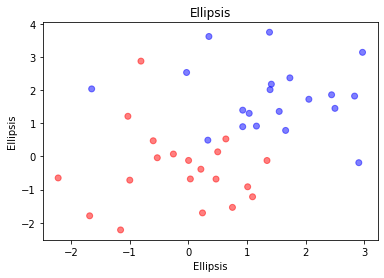

In [3]:
color = np.concatenate((np.repeat("red", n), np.repeat("blue",n)), axis=0) #y is split half half
plt.scatter(X[:,0], X[:,1], c = color, alpha= .5)
plt.xlabel(...)
plt.ylabel(...)
plt.title(...)
plt.show()

**Why does it look like a linear hard-margin SVM (or SVC since we are classifying) wouldn't work here?**

- Answer: No clear boundary, outliers

**Train a soft-margin linear SVC with associated cost $=1$, derive the confusion matrix, and visualise the decision boundary**

In [4]:
#well, we can still call `SVC` and this will work, because by default this package solves soft margin SVC
clf_c1 = svm.SVC(kernel = 'linear', C = 1)
clf_c1.fit(X, y);

In [5]:
cm = confusion_matrix(y, clf_c1.predict(X)) #fill the confusion matrix

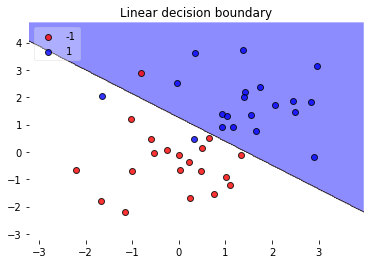

In [6]:
#plot the decision boundary
with warnings.catch_warnings(): #otherwise the package might complain there is no "boundary" when we classify all same
    warnings.simplefilter("ignore")
    plot_decision_regions(X, y, clf=clf_c1, legend=2, colors = "red,blue", markers= "o");
    ax=plt.gca();
    plt.title("Linear decision boundary")
    plt.show();

**Train a soft-margin linear SVC with associated cost $=0.01$, derive the confusion matrix, and visualise the decision boundary**

In [8]:
#well, we can still call `SVC` and this will work, because by default this package solves soft margin SVC
clf_c001 = svm.SVC(kernel='linear', C = 0.01)
clf_c001.fit(X, y);

In [9]:
cm = confusion_matrix(y, clf_c001.predict(X))

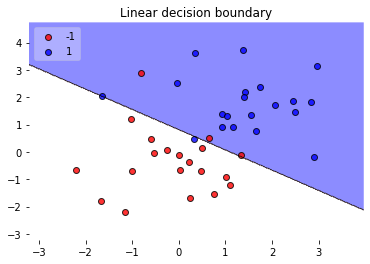

In [10]:
with warnings.catch_warnings(): #otherwise the package might complain there is no "boundary" when we classify all same
    warnings.simplefilter("ignore")
    plot_decision_regions(X, y, clf=clf_c001, legend=2, colors = "red,blue", markers= "o");
    ax=plt.gca();
    plt.title("Linear decision boundary")
    plt.show();

**Compare the number of support vectors of the previous two points**

Intuitively, support vectors are the vectors deleting which will result in the decision boundary to change. Remembering the bias-variance tradeoff, we would expect the model with a smaller variance to have more support vectors, since otherwise it means that deleting small number of points change the shape of the decision boundary which would then make the model be highly biased on the training set.

Moreover, in soft-margin classification, increasing the associated cost will penalize misclassification more, hence the SVC will be forced to be biased. We therefore expect the number of support vectors to decrease with increasing cost. Use `clf.support_vectors_` attribute of `sklearn.svm` to compare the numbers.

In [12]:
support_vectors_c1 = clf_c1.support_vectors_ #count the numbers (optional: mark the support vectors on the plot)

In [13]:
support_vectors_c2 = clf_c001.support_vectors_

In [15]:
print(len(support_vectors_c1))

11


In [16]:
print(len(support_vectors_c2))

36
